# Independent Project - Week 8: Decision trees and support vector machine


### the context
Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  
### Defining the question
How do you know that someone with specifi test reslts has thyroid or not?

### Metrics for success


Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

## Import required libraries and load data needed

In [33]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,f1_score


from sklearn.tree import export_graphviz
from io import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor


In [2]:
#load data
df = pd.read_csv('data/hypothyroid.csv')
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


## Exploratort Data Analysis

In [3]:

df.isnull().any().sum()
# Initially iot shows that there are no nul values but seems those with '?' were nan

0

In [4]:

# Checking for duplicates

len(df[df.duplicated()])


77

In [5]:
df.drop_duplicates(keep='first', inplace = True)

# Checking to confirm whether duplicates have been dropped
#
df.duplicated().any()

False

In [6]:
#convert column names to lower case for easy maniplations 
df.columns = df.columns.str.lower()
df.columns


Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg'],
      dtype='object')

In [7]:
# check for uniformity using for loop
for column in df.columns:
    print(column)
    print(df[column].nunique())
    print(df[column].unique())
    print('\n')
    print('----------------------------------')

status
2
['hypothyroid' 'negative']


----------------------------------
age
93
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']


----------------------------------
sex
3
['M' 'F' '?']


----------------------------------
on_thyroxine
2
['f' 't']


----------------------------------
query_on_thyroxine
2
['f' 't']


----------------------------------
on_antithyroid_medication
2
['f' 't']


----------------------------------
thyroid_surgery
2
['f' 't']


----------------------------------
query_hypothyroid
2
['f' 't']


----------------------------------
query_hyperthyroid
2
['f

In [8]:

# '?' means nan hence we can replace to show the exact intention of the daa collected
#
df.replace('?', np.nan, inplace=True)


<AxesSubplot:>

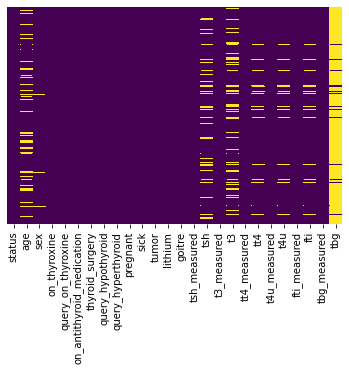

In [9]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False, cmap='viridis')
#we should drop tbg and its related variable since it has so many nan  hence we cannot fill

In [10]:
#df.drop(['tbg', 'tbg_measured'], axis=1, inplace=True)
df.drop(['tbg', 'tbg_measured', 't3','t3_measured'], axis=1, inplace=True)

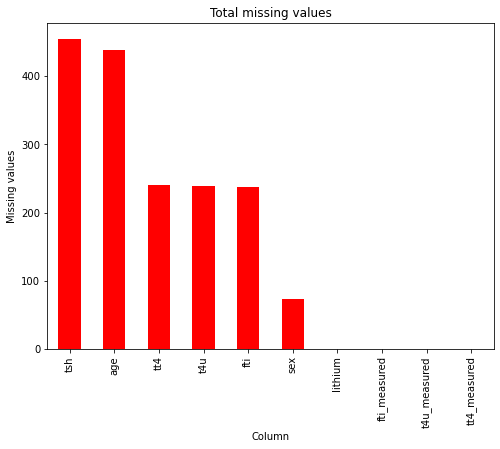

In [11]:
# check for missing values after replacement 
df.isna().sum().sort_values(ascending = False)[:10].plot(kind = 'bar', figsize = (8, 6), color = 'red')
plt.title('Total missing values')
plt.ylabel('Missing values')
plt.xlabel('Column')
plt.show()
#We have removed those with many nans hence we can now fill the rest

In [12]:
# Changing column datatypes to their appriopriate datatypes

# Numerical columns list

#num_cols = ['age', 'tsh', 't3', 'tt4', 't4u', 'fti']
num_cols = ['age', 'tsh', 'tt4', 't4u', 'fti']

# Categorical columns list
#cat_cols = ['status', 'sex','tsh_measured', 't3_measured', 'tt4_measured',\
            #'t4u_measured', 'fti_measured', 'tbg_measured']
cat_cols = ['status', 'sex','tsh_measured', 't3_measured', 'tt4_measured','t4u_measured', 'fti_measured', 'tbg_measured']

# Boolean columns list
bool_cols = ['on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',\
            'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre']

# Replacing bool columns with True or False value
#
for column in bool_cols:
  df[column] = df[column].replace('f', False)
  df[column] = df[column].replace('t', True)
  
# Using a for loop to change columns to their appriopriate datatypes
#
for column in df.columns:
  if column in num_cols:
    df[column] = df[column].astype('float')
  elif column in cat_cols:
    df[column] = df[column].astype('category')
  elif column in bool_cols:
    df[column] = df[column].astype('bool')
  
# Previewing the column datatypes to check whether the changes have been effected
#
df.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                     bool
query_on_thyroxine               bool
on_antithyroid_medication        bool
thyroid_surgery                  bool
query_hypothyroid                bool
query_hyperthyroid               bool
pregnant                         bool
sick                             bool
tumor                            bool
lithium                          bool
goitre                           bool
tsh_measured                 category
tsh                           float64
tt4_measured                 category
tt4                           float64
t4u_measured                 category
t4u                           float64
fti_measured                 category
fti                           float64
dtype: object

In [13]:
df.sex.mode()[0]

'F'

In [14]:
# Fill missing values in the sex column with mode
#
df.sex.fillna(df.sex.mode()[0], inplace = True)

#use for loop to fill numerical columns witrh mean
#
for column in num_cols:
  df[column].fillna(df[column].mean(), inplace = True)
  
# Checking whether the missing values have been filled appriopriately
#
df.isnull().sum().any()

False

In [15]:
#check the cleaned dataset again
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,lithium,goitre,tsh_measured,tsh,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti
0,hypothyroid,72.0,M,False,False,False,False,False,False,False,...,False,False,y,30.0,y,15.0,y,1.48,y,10.0
1,hypothyroid,15.0,F,True,False,False,False,False,False,False,...,False,False,y,145.0,y,19.0,y,1.13,y,17.0
2,hypothyroid,24.0,M,False,False,False,False,False,False,False,...,False,False,y,0.0,y,4.0,y,1.00,y,0.0
3,hypothyroid,24.0,F,False,False,False,False,False,False,False,...,False,False,y,430.0,y,6.0,y,1.04,y,6.0
4,hypothyroid,77.0,M,False,False,False,False,False,False,False,...,False,False,y,7.3,y,57.0,y,1.28,y,44.0


<AxesSubplot:>

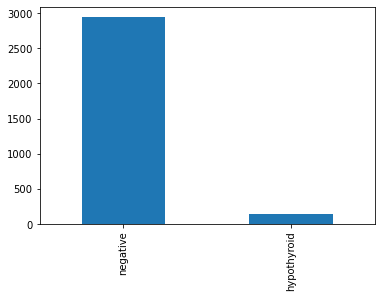

In [16]:
df['status'].value_counts().plot(kind='bar')
# Shows that many are classified negative 

C:\Users\ronal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


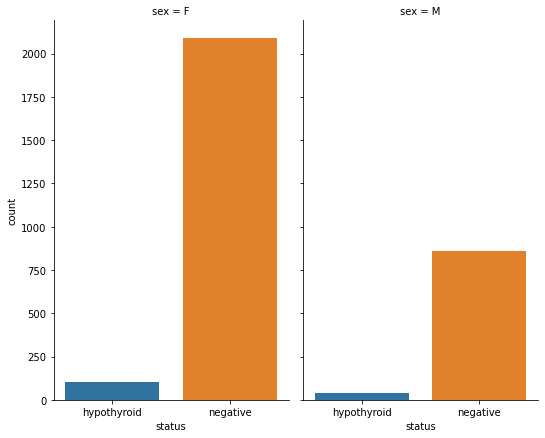

In [17]:
# Plotting bar charts
#
sns.catplot("status", col="sex", col_wrap=4, data=df, kind="count", height=6, aspect=.6)
plt.show()

<AxesSubplot:>

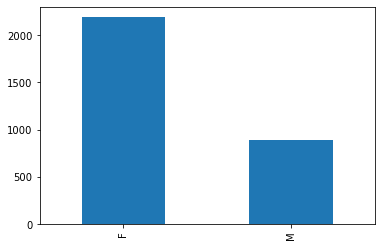

In [18]:
df['sex'].value_counts().plot(kind='bar')


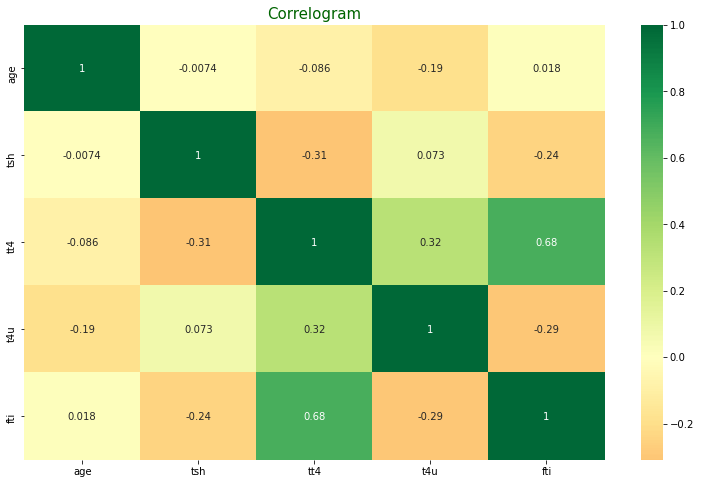

In [19]:

# Plotting a heatmap to show correlations between numerical variables
#
corr = df[num_cols].corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

In [20]:
df.describe()

,age,tsh,tt4,t4u,fti
count,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000
mean,51.112538,5.809320,108.706922,0.977559,115.489080
std,17.854431,22.180994,42.836471,0.216873,57.780967
min,1.000000,0.000000,2.000000,0.000000,0.000000
25%,38.000000,0.000000,85.000000,0.860000,92.000000
50%,51.112538,1.000000,107.000000,0.977559,110.000000
75%,64.000000,5.809320,124.000000,1.050000,126.000000
max,98.000000,530.000000,450.000000,2.210000,881.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3086 entries, 0 to 3162
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   status                     3086 non-null   category
 1   age                        3086 non-null   float64 
 2   sex                        3086 non-null   category
 3   on_thyroxine               3086 non-null   bool    
 4   query_on_thyroxine         3086 non-null   bool    
 5   on_antithyroid_medication  3086 non-null   bool    
 6   thyroid_surgery            3086 non-null   bool    
 7   query_hypothyroid          3086 non-null   bool    
 8   query_hyperthyroid         3086 non-null   bool    
 9   pregnant                   3086 non-null   bool    
 10  sick                       3086 non-null   bool    
 11  tumor                      3086 non-null   bool    
 12  lithium                    3086 non-null   bool    
 13  goitre                     3086 n

## Decision trees

### Random forest classifier 

In [22]:
# Selecting the independent variables and the target variable
 
#
X = df.drop('status', axis = 1)
#convert hypothyroid to 1 and negative to 0 for better machine understanding
y = np.where(df.status == 'hypothyroid', 1, 0)

# Encoding categorical variables with get dummies. 
#
X = pd.get_dummies(X)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
#
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)

# Making predictions
#
y_pred = rf.predict(X_test)

# Measuring the accuracy of the model
#
#print(f'accuracy score  for the model: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print("accucy score for the model is: " + str(accuracy_score(y_test, y_pred)))
print('\n')
print("confusion matrics \n"  + str(confusion_matrix(y_test, y_pred)))


#this model has done very well in cllassifying this data


accucy score for the model is: 0.9946004319654428


confusion matrics 
[[886   1]
 [  4  35]]


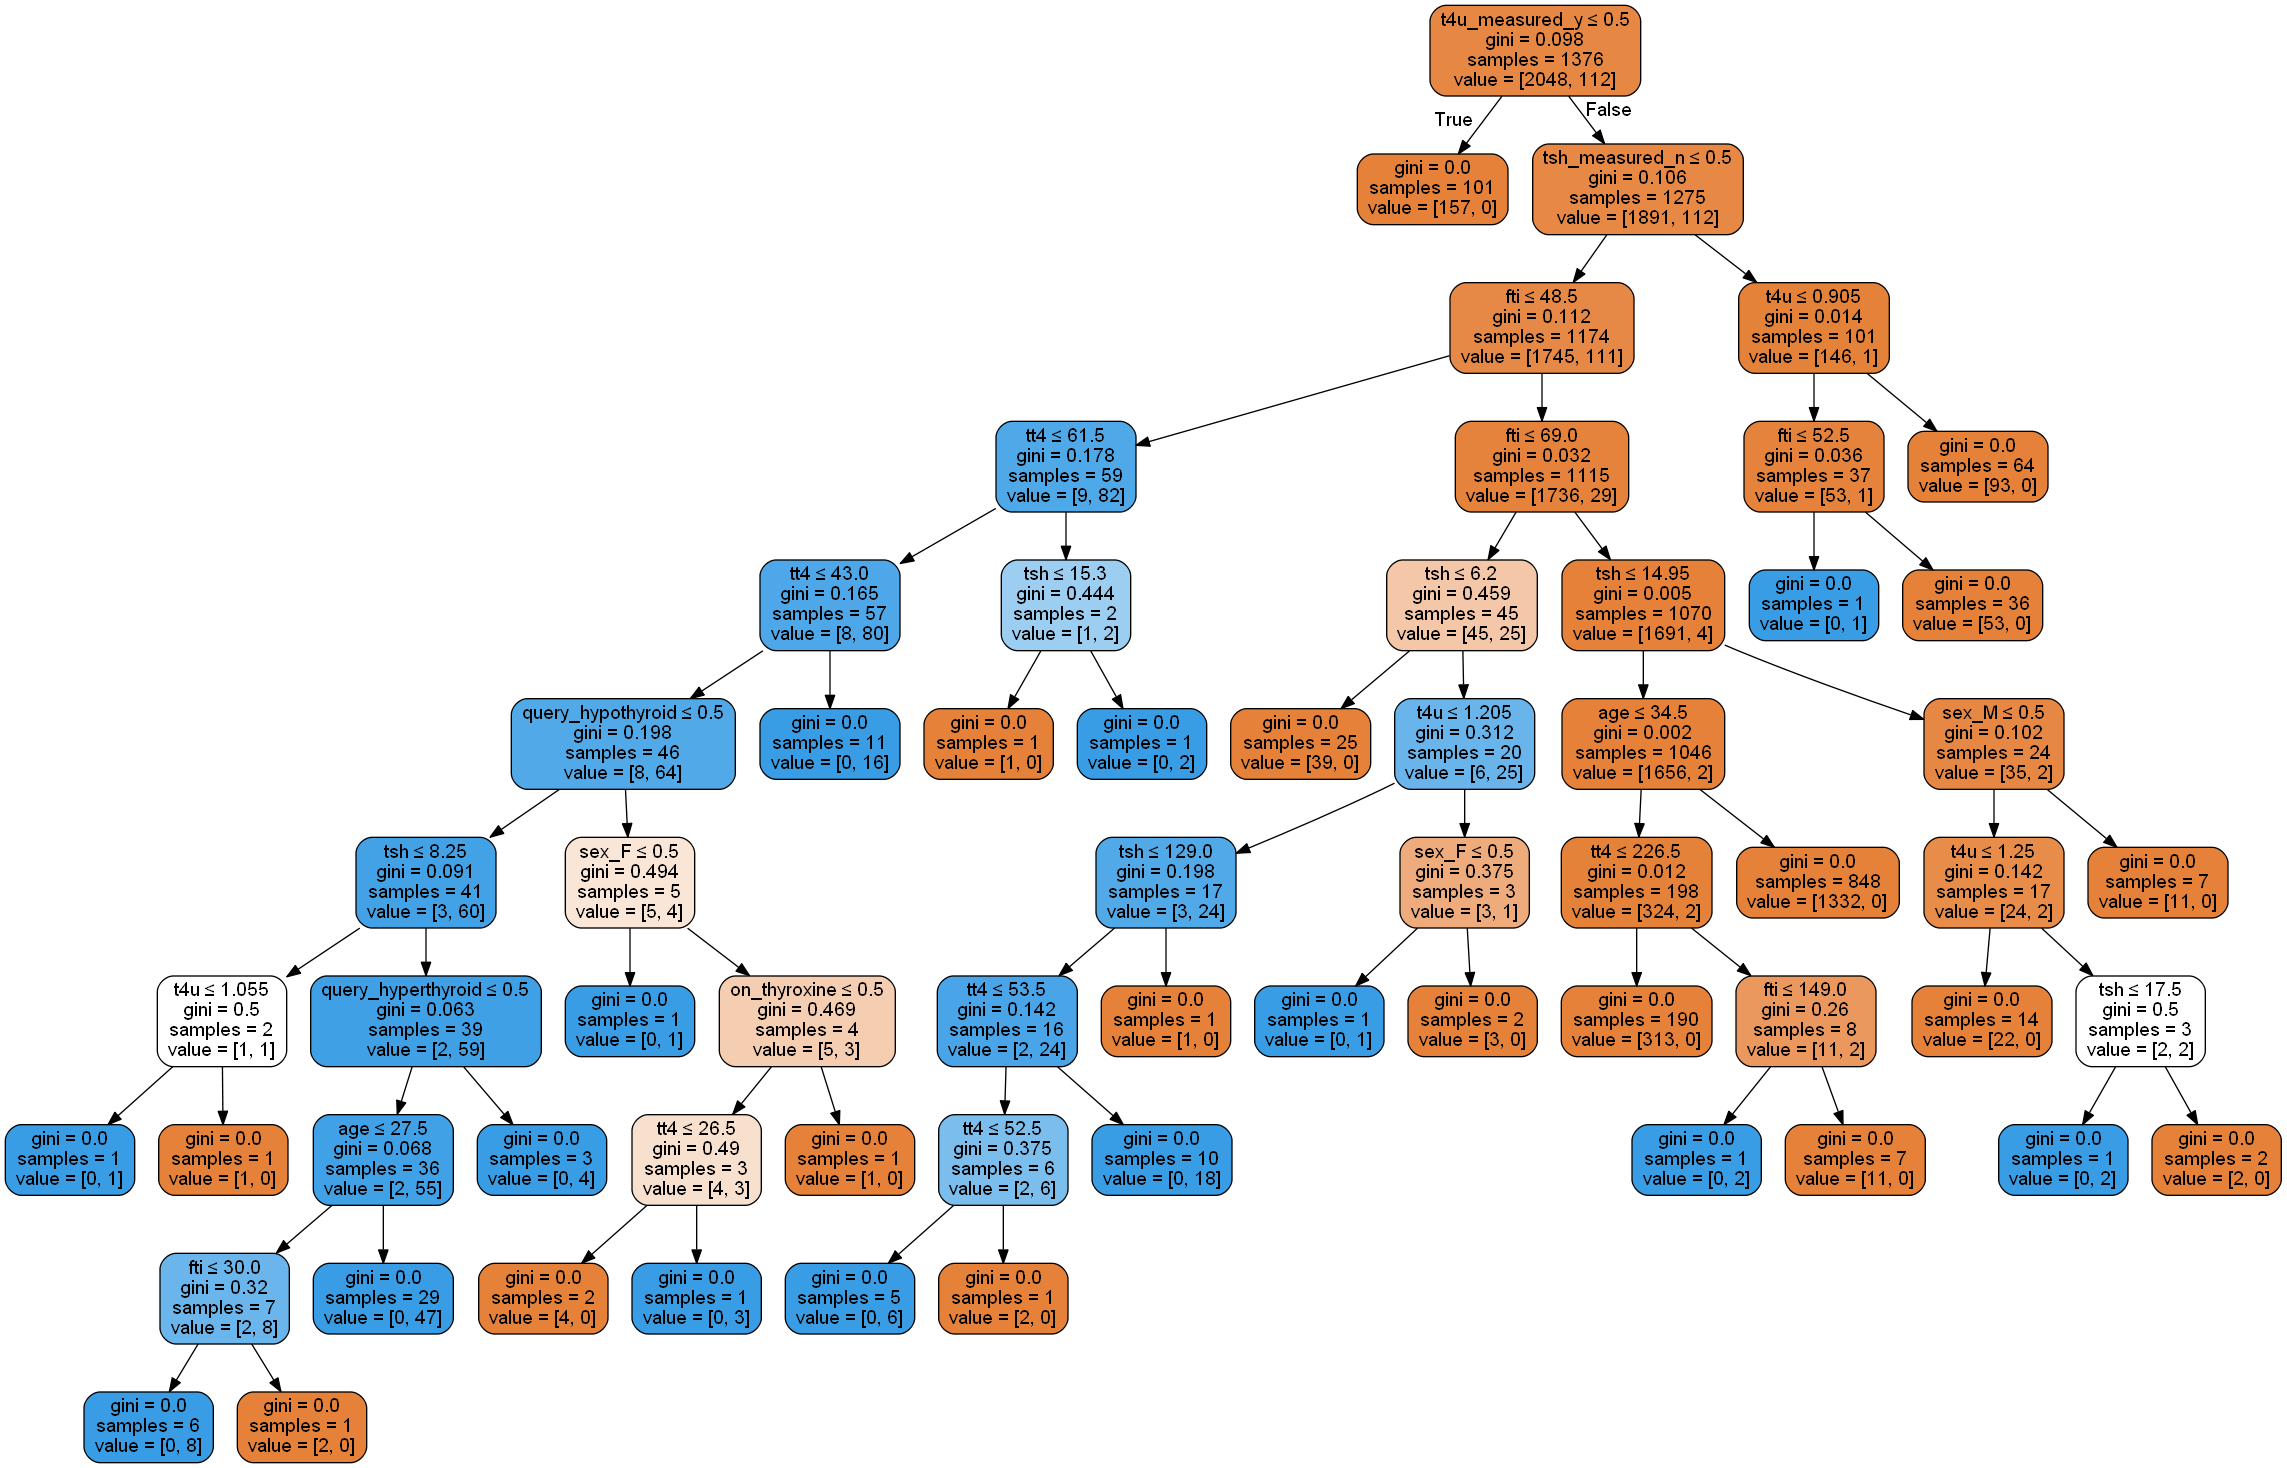

In [23]:
# picking the 3rd tree from the forest
tree = rf.estimators_[3]

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Ada boost trees

No handles with labels found to put in legend.


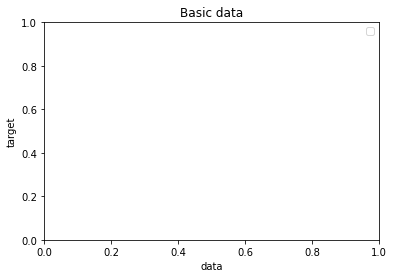

In [37]:


target_number_of_trees = 300

gbr = GradientBoostingRegressor(n_estimators=target_number_of_trees, learning_rate=0.1, max_depth=2)
gbr = gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X)

# plt.figure()
# plt.scatter(X, y, c="k", label="training samples")

# plt.xlabel("data")
# plt.ylabel("target")
# plt.title("Basic data")
# plt.legend()
# plt.show()

In [50]:
#Feature importance
# Fature importance 
# Get numerical feature importances


test_features = df.columns.to_list()
test_features.remove('status')
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

importances = list(forest.feature_importances_)


# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.04), ('sex', 0.01), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.01), ('on_antithyroid_medication', 0.01), ('thyroid_surgery', 0.01), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.27), ('tsh_measured', 0.23), ('tsh', 0.04), ('tt4_measured', 0.36), ('tt4', 0.01), ('t4u_measured', 0.0), ('t4u', 0.0), ('fti_measured', 0.0), ('fti', 0.0)]

Variable: tt4_measured         Importance: 0.36
Variable: goitre               Importance: 0.27
Variable: tsh_measured         Importance: 0.23
Variable: age                  Importance: 0.04
Variable: tsh                  Importance: 0.04
Variable: sex                  Importance: 0.01
Variable: query_on_thyroxine   Importance: 0.01
Variable: on_antithyroid_medication Importance: 0.01
Variable: thyroid_surgery      Importance: 0.01
Variable: tt4                  Importance: 0.01
Variable: on_thyroxine         Importance: 0.0
Variable: query_hypothyr

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3086 entries, 0 to 3162
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   status                     3086 non-null   category
 1   age                        3086 non-null   float64 
 2   sex                        3086 non-null   category
 3   on_thyroxine               3086 non-null   bool    
 4   query_on_thyroxine         3086 non-null   bool    
 5   on_antithyroid_medication  3086 non-null   bool    
 6   thyroid_surgery            3086 non-null   bool    
 7   query_hypothyroid          3086 non-null   bool    
 8   query_hyperthyroid         3086 non-null   bool    
 9   pregnant                   3086 non-null   bool    
 10  sick                       3086 non-null   bool    
 11  tumor                      3086 non-null   bool    
 12  lithium                    3086 non-null   bool    
 13  goitre                     3086 n

In [53]:
df[['tt4_measured','goitre','status']]

,tt4_measured,goitre,status
0,y,False,hypothyroid
1,y,False,hypothyroid
2,y,False,hypothyroid
3,y,False,hypothyroid
4,y,False,hypothyroid
...,...,...,...
3158,y,False,negative
3159,y,False,negative
3160,y,False,negative
3161,y,False,negative


## Support Vector Machine

In [60]:
# Selecting the independent variables and the target variable
#
X = df[['fti', 'tsh']].values
y = np.where(df.status == 'hypothyroid', 1, 0)

# Instantiating and creating a list of models for iteration
#
poly = SVC(kernel='poly')
linear = SVC(kernel = 'linear')
rbf = SVC(kernel ='rbf')

# Creating a list of the models and model names
#
models = [poly, linear, rbf]
model_names = ['Polynomial', 'Linear', 'Rbf']
# Creating a function that trains a model and returns its accuracy together with the model
#
def predictor(model, X, y):
  # Splitting the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
  
  # Standardising the data
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  
  # Training the model and making predictions
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  # Measuring the accuracy of the model
  f1 = f1_score(y_test, y_pred)
  acc = accuracy_score(y_test, y_pred)
  
  # Returning the accuracy and the model
  return acc, f1, model

# Getting the accuracies of the models  using a for loop
#
for model, name in zip(models, model_names):
  print(f'The accuracy score of {name:<10} is: {predictor(model, X, y)[0]} and the f1 score is: {predictor(model, X, y)[1]}')

The accuracy score of Polynomial is: 0.9838012958963283 and the f1 score is: 0.7692307692307693
The accuracy score of Linear     is: 0.9859611231101512 and the f1 score is: 0.8169014084507042
The accuracy score of Rbf        is: 0.9848812095032398 and the f1 score is: 0.7941176470588235


,fti,tsh,status
0,10.0,30.0,hypothyroid
1,17.0,145.0,hypothyroid
2,0.0,0.0,hypothyroid
3,6.0,430.0,hypothyroid
4,44.0,7.3,hypothyroid
...,...,...,...
3158,95.0,5.8,negative
3159,98.0,0.8,negative
3160,104.0,1.2,negative
3161,137.0,1.3,negative


### Function to predict the disease as per the trained data

In [72]:
def predict_hypothyroid(fti, tsh): #Function takes two trained parameters
    model1 = model.predict([[fti, tsh]])
    if model1 ==1:
        print('The patient has hypothyroid')
    else:
        print('The patient does not exhibit symptoms of hypothyroid')
    return model1
# Call the function to show the likely disease
predict_hypothyroid(104.0,1.2)

The patient does not exhibit symptoms of hypothyroid


array([0])

### Challenging the solution

From the data given, most of it is skewed to those without the disease. This might make the model classify many patients that they do not have since it has been trained on mostly negative patients.
We therefore need more data to ensure our data is balanced for better modelling

## Report

Initially data contained no nan but close check resulted to further analysis where I found out that all those with question marks were indeed nans.
I replaced them with nan and visualized them to shpw the percentage of missing values. I dropped two columns since they ahd so many missing values.
For those numericals, I replaced with mean whole those categorical and boolean I used mode to replace nans.

The dataset had three datatypes. float, booleans and categorical. Fortunately, all the models accepts all of them hence the issue was to ensure I converted them to the required datatyes with booleans changing them to True and false. 

I then used decision trees and support vector machine models to do predictions. For Decision trees I used rando forest and adaboost. I was getting very good accuracy score wich means the model performed very well.

For SVM I used support vector classifier where I used two features to make predictions. Lastly, I created a function where anyone can enter the values to predict whether the patient has hypothyroid or not. 